![](https://api.brandy.run/core/core-logo-wide)

# Ensemble Learning

<img src="img/two_heads.jpeg" width="300"/>

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

## This model can't possibly get better

Hemos visto al largo de las ultimas clases, una serie de herramientas para mejorar y encontrar el mejor modelo posible para nuestros datos. Pero seguramente llegará un momento en que no podremos optimizar el modelo, ¿no?

¿Que podemos hacer entonces?

<img src="img/buttons.jpeg" width="300" />

In [105]:
good_model_acc = .75
not_so_good_model_acc = .51

In [106]:
# Remember Prob Distribution?
# k = Max number of favorable outcomes  (k o menos exitos)
# n = Number of experiments
# p = Probability of success

# binom.cdf(k, n, p)

In [107]:
# Calc prob
n = np.arange(1,10_001,1)
k = n//2
p = not_so_good_model_acc

prob_dist = 1 - binom.cdf(k,n,p)

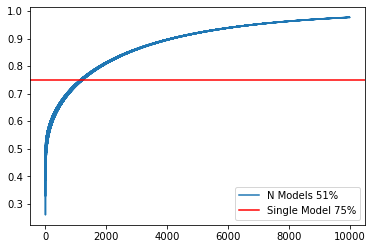

In [108]:
# Plot
plt.plot(n, prob_dist, label="N Models 51%")
plt.axhline(good_model_acc, label="Single Model 75%", color="red")
plt.legend()
plt.show()

## Conditions

<img src="img/apes.jpeg" width="300"/>

Para que eso sea verdad, nuestros modelos tienen que cumplir unos requisitos:
- Predictores independientes
- Errores no correlacionados

Eso es, el mismo modelo malo mil veces seguirá mil veces malo. 

Dos maneras de evitar el incumplimento de esos requisitos son:
- Usar algoritmos muy diferentes
- Entrenar los modelos con diferentes datos

In [109]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [110]:
X, y = make_moons(n_samples=500, noise=.30)

In [111]:
X.shape

(500, 2)

In [112]:
y.shape

(500,)

In [113]:
colors = ["green" if lb == 1 else "red" for lb in y]

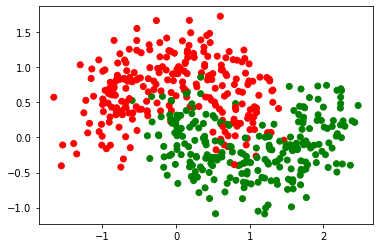

In [115]:
plt.scatter(X[:,0],X[:,1], c=colors)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

<img src="img/voting.png" width="300"/>

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [148]:
models = {
    "LogisticRegression":LogisticRegression(),
    "RandomForest":RandomForestClassifier(),
    "SVC":SVC()
}

In [149]:
models.items()

dict_items([('LogisticRegression', LogisticRegression()), ('RandomForest', RandomForestClassifier()), ('SVC', SVC())])

In [150]:
ensemble_voting = VotingClassifier(
    estimators=models.items(),
    voting="hard")

In [151]:
for model in [*models.values(), ensemble_voting]:
    model.fit(X_train, y_train)

In [152]:
for name, model in [*models.items(), ("VotingClassifier",ensemble_voting)]:
    y_pred = model.predict(X_test)
    print(f"{name} : {accuracy_score(y_test,y_pred)}")

LogisticRegression : 0.808
RandomForest : 0.848
SVC : 0.848
VotingClassifier : 0.84


## Hard vs Soft Voting

Como podemos ver, en `voting` para el classificador hemos eligido la estratégia `"hard"`, hay otra posibilidad, que es la estratégia `"soft"`. Veamos en como se diferen:

### Hard Voting

Cada predictor vota en una clase y la clase más votada es la predicha por el Ensemble

### Soft Voting

En la estratégia soft, se utiliza el método `predict_proba` de cada modelo para eligir la clase con la mejor média de probabilidad. Para eso, tenemos que asegurarnos que todos los modelos usados tengan esa clase.

In [153]:
y_test[:5]

array([1, 0, 0, 0, 1])

In [154]:
models["LogisticRegression"].predict(X_test[:5])

array([0, 0, 0, 0, 0])

In [155]:
models["LogisticRegression"].classes_

array([0, 1])

In [156]:
models["LogisticRegression"].predict_proba(X_test[:5])

array([[0.72464118, 0.27535882],
       [0.98317564, 0.01682436],
       [0.98183814, 0.01816186],
       [0.95555209, 0.04444791],
       [0.50064088, 0.49935912]])

In [157]:
models["RandomForest"].predict_proba(X_test[:5])

array([[0.8 , 0.2 ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.33, 0.67]])

In [158]:
models["SVC"].predict_proba(X_test[:5])

AttributeError: predict_proba is not available when  probability=False

In [159]:
models = {
    "LogisticRegression":LogisticRegression(),
    "RandomForest":RandomForestClassifier(),
    "SVC":SVC(probability=True)
}

ensemble_voting = VotingClassifier(
    estimators=models.items(),
    voting="soft")

In [160]:
for model in [*models.values(), ensemble_voting]:
    model.fit(X_train, y_train)

In [161]:
for name, model in [*models.items(), ("VotingClassifier",ensemble_voting)]:
    y_pred = model.predict(X_test)
    print(f"{name} : {accuracy_score(y_test,y_pred)}")

LogisticRegression : 0.808
RandomForest : 0.84
SVC : 0.848
VotingClassifier : 0.848


In [162]:
from sklearn.metrics import precision_score, recall_score

for name, model in [*models.items(), ("VotingClassifier",ensemble_voting)]:
    y_pred = model.predict(X_test)
    print(f"{name} Precision : {precision_score(y_test,y_pred)}")
    print(f"{name} Recall : {recall_score(y_test,y_pred)}")

LogisticRegression Precision : 0.8289473684210527
LogisticRegression Recall : 0.8513513513513513
RandomForest Precision : 0.8648648648648649
RandomForest Recall : 0.8648648648648649
SVC Precision : 0.8767123287671232
SVC Recall : 0.8648648648648649
VotingClassifier Precision : 0.8767123287671232
VotingClassifier Recall : 0.8648648648648649


In [163]:
ensemble_voting.predict(X_test[:5])

array([0, 0, 0, 0, 1])

In [164]:
ensemble_voting.predict_proba(X_test[:5])

array([[0.60915045, 0.39084955],
       [0.99206877, 0.00793123],
       [0.98863515, 0.01136485],
       [0.98106239, 0.01893761],
       [0.28383919, 0.71616081]])

In [165]:
def predict_with_threshold(model, X, threshold=.5):
    proba = model.predict_proba(X)
    pred = np.array([*map(lambda x: x > threshold, proba)]).astype(int)
    return np.array([*map(lambda x: np.where(x.sum()==0,-1, x.argmax()), pred)])

In [166]:
predict_with_threshold(ensemble_voting,X_test[:5],.7)

array([-1,  0,  0,  0,  1])

In [167]:
y_test[:5]

array([1, 0, 0, 0, 1])

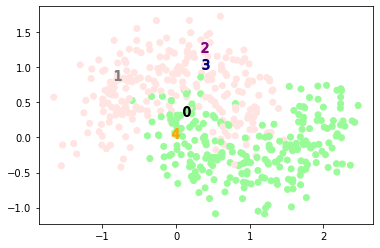

In [168]:
colors = ["palegreen" if lb == 1 else "mistyrose" for lb in y]
plt.scatter(X[:,0],X[:,1], c=colors)
c=["k","gray","purple","navy","orange"]
for i in range(5):
    plt.scatter(X_test[i,0],X_test[i,1], marker=f"${i}$", s=100,  c=c[i])

In [169]:
def plot_decision_boundary(tree, X, y):
    x1s = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    x2s = np.linspace(X[:,1].min(), X[:,1].max(), 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.column_stack([x1.flatten(), x2.flatten()])
    y_pred = tree.predict(X_new).reshape(x1.shape)
    
    colors = ["green" if lb==0 else "red" for lb in y]
    plt.scatter(X[:,0],X[:,1], c=colors)
    plt.contourf(x1, x2, y_pred, alpha=.5)

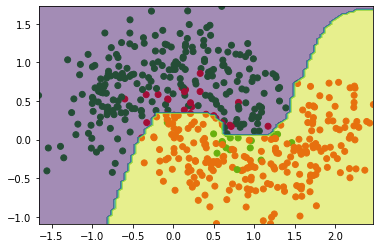

In [170]:
plot_decision_boundary(ensemble_voting, X, y)

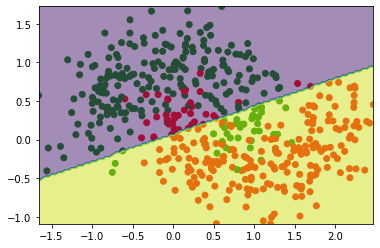

In [176]:
plot_decision_boundary(models["LogisticRegression"], X, y)

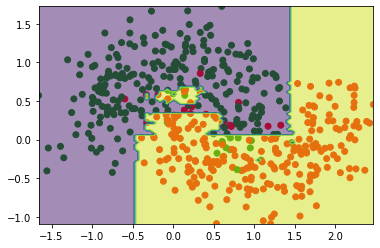

In [177]:
plot_decision_boundary(models["RandomForest"], X, y)

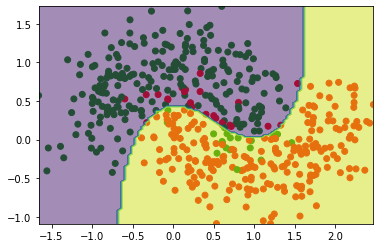

In [178]:
plot_decision_boundary(models["SVC"], X, y)

## Bagging

Como mencionamos antes, para evitar que los errores sean correlacionados entre los diferentes modelos, podemos también entrenarles con diferentes datos, o mejor dicho, con diferents muestras del `Training Set`, como representado en la imagen abajo:

<img src="img/bagging.png" width=500/>

Si el muestreo se hace con reposición, eso es, un mismo elemento puede ser selecionado más de una vez, llamamos a ese proceso `bagging` o `bootstrap aggregating`. Pero si lo realizamos sin reposición de elementos, el proceso se llama `pasting`.

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [190]:
tree = DecisionTreeClassifier()
bagging = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=1_000, # Numero de instancias del modelo
                            max_samples=200, # Tamaño de la muestra para cada modelo
                            bootstrap=True) # Cambiar a False para Pasting

In [191]:
X_train.shape

(375, 2)

In [192]:
for model in [tree, bagging]:
    model.fit(X_train, y_train)

In [193]:
bagging.predict(X_test[[0]])

array([0])

In [194]:
for name, model in zip(["SingleTree", "500_Trees"],[tree, bagging]):
    y_pred = model.predict(X_test)
    print(f"{name} : {accuracy_score(y_test, y_pred)}")

SingleTree : 0.84
500_Trees : 0.856


In [195]:
len(bagging.estimators_)

1000

In [196]:
bagging.estimators_[3].predict(X_test[[0]])

array([0])

In [197]:
accuracy_trees = [accuracy_score(y_test, model.predict(X_test)) for model in bagging.estimators_]

In [198]:
accuracy_trees[:5]

[0.768, 0.856, 0.864, 0.864, 0.816]

In [199]:
max(accuracy_trees)

0.904

In [200]:
def plot_decision_boundary(tree, X, y):
    x1s = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    x2s = np.linspace(X[:,1].min(), X[:,1].max(), 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.column_stack([x1.flatten(), x2.flatten()])
    y_pred = tree.predict(X_new).reshape(x1.shape)
    
    colors = ["green" if lb==0 else "red" for lb in y]
    plt.scatter(X[:,0],X[:,1], c=colors)
    plt.contourf(x1, x2, y_pred, alpha=.5)

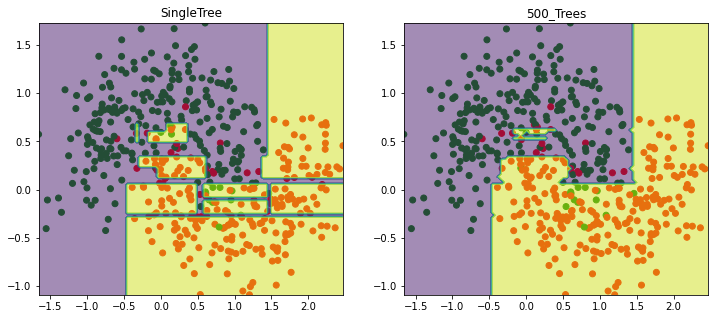

In [201]:
plt.figure(figsize=(12,5))
for i,(name, model) in enumerate(zip(["SingleTree", "500_Trees"],[tree, bagging])):
    plt.subplot(1,2,i+1)
    plt.title(name)
    plot_decision_boundary(model,X,y)

## Out-of-Bag Evaluation

Como en el proceso de bootstrapping, parte de los datos no es selecionada para la muestra (out of bag), podemos usar esos datos para estimar el accuracy que nuestro modelo tendrá en el accuracy.

In [202]:
bagging = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500, # Numero de instancias del modelo
                            max_samples=100, # Tamaño de la muestra para cada modelo
                            bootstrap=True, # Cambiar a False para Pasting
                            random_state=42,
                            oob_score=True)
bagging.fit(X_train, y_train)
bagging.oob_score_

0.944

In [203]:
accuracy_score(y_test,bagging.predict(X_test))

0.848

In [204]:
bagging.oob_decision_function_[:3]

array([[0.17250674, 0.82749326],
       [0.0027027 , 0.9972973 ],
       [0.23896104, 0.76103896]])

## Random Patches and Random Subspaces

Si estamos trabajando con problemas de gran dimensionalidad, tenemos una posibilidad extra, que es hacer el mismo proceso de muestreo de las columnas.

- Random Patches: Sampling de los data points y de las features

- Random Subspaces: Usar todo el training set para cada modelo, pero hacer sampling de las features usadas en cada uno

In [77]:
from sklearn.datasets import load_digits

In [78]:
X, y = load_digits(return_X_y=True)

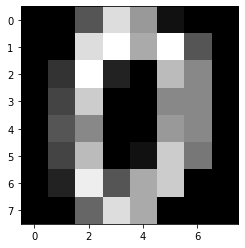

In [79]:
plt.imshow(X[0].reshape(8,8), cmap="gray")

In [80]:
X.shape

(1797, 64)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [82]:
tree = DecisionTreeClassifier(random_state=42)
bagging = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500, # Numero de instancias del modelo
                            max_samples=100, # Tamanho de la muestra para cada modelo
                            bootstrap=True, # Cambiar a False para Pasting
                            random_state=42)

random_patches = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500, # Numero de instancias del modelo
                            max_samples=100, # Tamanho de la muestra para cada modelo
                            bootstrap=True, # Cambiar a False para Pasting
                            random_state=42,
                            bootstrap_features=True, # Hacer tambien bootstrap de features
                            max_features=.5) # % maximo de las features en cada modelo.

random_subspaces = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500, # Numero de instancias del modelo
                            bootstrap=False, # No hacemos bootstrap de filas
                            max_samples=1.0, # Todos modelos tendran todos las filas
                            random_state=42,
                            bootstrap_features=True, # Hacer tambien bootstrap de features
                            max_features=.5) # % maximo de las features en cada modelo.

In [83]:
for model in [tree, bagging, random_patches, random_subspaces]:
    model.fit(X_train, y_train)

In [84]:
for name, model in zip(["SingleTree", "500_Trees", "RandomPatches","RandomSubspaces"],[tree, bagging, random_patches,random_subspaces]):
    y_pred = model.predict(X_test)
    print(f"{name} : {accuracy_score(y_test, y_pred)}")

SingleTree : 0.8577777777777778
500_Trees : 0.9377777777777778
RandomPatches : 0.9355555555555556
RandomSubspaces : 0.9777777777777777


## Random Forest

El modelo Random Forest que ya vimos antes es por si mismo un Ensemble, pues es un bagging de muchos Decision Tree, cada cual usando diferentes features

In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [207]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.848

In [208]:
rf_2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=1.0,bootstrap=True,n_jobs=-1)

In [209]:
rf_2.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1)

In [210]:
y_pred = rf_2.predict(X_test)
accuracy_score(y_test, y_pred)

0.848

## Extra Trees
Si además de utilizar un subset random de features, usarmos threshold random para las decisiones, estaremos haciendo un `Extremely Randomized Trees`.

In [211]:
from sklearn.ensemble import ExtraTreesClassifier

In [212]:
extra = ExtraTreesClassifier(n_estimators=500)

In [213]:
extra.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=500)

In [214]:
y_pred = extra.predict(X_test)
accuracy_score(y_test, y_pred)

0.856

## Feature Importance

In [215]:
from sklearn.datasets import fetch_openml
X,y = fetch_openml("mnist_784",return_X_y=True)
#X, y = load_digits(return_X_y=True)

In [216]:
X_samp = X[:4000]
y_samp = y[:4000].astype(int)

In [217]:
rf = RandomForestClassifier()

In [218]:
rf.fit(X,y)
#rf.fit(X_samp, y_samp)

RandomForestClassifier()

In [219]:
import seaborn as sns

In [220]:
rf.feature_importances_.shape

(784,)

In [221]:
rf.feature_importances_.reshape((28,28)).shape

(28, 28)

Text(0.5, 1.0, 'El bebé de Rosemary')

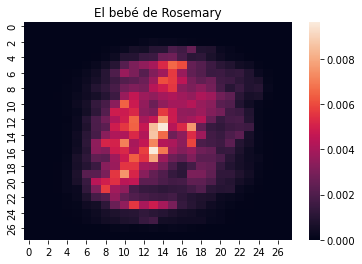

In [222]:
sns.heatmap(rf.feature_importances_.reshape(28,28))
plt.title("El bebé de Rosemary")

In [103]:
X.shape

(70000, 784)